In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
from scipy.optimize import least_squares, curve_fit
from matplotlib import pylab as plt
import pandas as pd
import glob
import time
from tqdm.notebook import tqdm
import os
import random

import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("error", OptimizeWarning)

import seaborn as sns
sns.set()

In [2]:
def plot_allbands_df(df,title=None,ax=plt):
    ugrizYcolors = ["violet","green","red","darkred","grey","black"]
    for i,band in enumerate("ugrizY"):
        subdf = df[df["band"]==band].reset_index(drop=True)
        x = subdf["mjd"]
        y = subdf["flux"]
        yerr = subdf["fluxerr"]
#         ax.errorbar(x,y,yerr=yerr,ls = "None",color=ugrizYcolors[i])
        ax.scatter(x,y,s=5,label=band,color=ugrizYcolors[i])
        if title is not None:
            if ax is not plt:
                ax.set_title(title)
            else:
                ax.title(title)
    return ax

In [3]:
def center_bigdf(df):
    
    df["mjd"] = df["mjd"] - df["mjd"][0]
    df["ratio"] = abs(df["flux"]/df["fluxerr"])

    df["ratio2bool"] = 0

    subdf_detected = df[df["detected_bool"]==1]
    subdf_ratio2 = df[df["ratio"]>=2]


    smalldf = subdf_ratio2.loc[abs(subdf_ratio2.mjd.diff(periods=-1))<=5]
    for i in range(3):
        smalldf = smalldf[abs(smalldf.mjd.diff(periods=-1))<=5]

    if len(subdf_detected)>0 and len(smalldf)>0:
        detected_bool_minmjd = subdf_detected.mjd.values[0]
        custom_bool_minmjd = smalldf.mjd.values[0]

        diffmjd = abs(detected_bool_minmjd - custom_bool_minmjd)/2

        minmjdstart = min(detected_bool_minmjd, custom_bool_minmjd)
        maxmjdstart = max(detected_bool_minmjd, custom_bool_minmjd)

        mjdlim_lower = minmjdstart - (100-diffmjd)
        mjdlim_upper = maxmjdstart + (100-diffmjd)

    elif len(subdf_detected)>0:
        detected_bool_minmjd = subdf_detected.mjd.values[0]
        mjdlim_lower = detected_bool_minmjd - 100
        mjdlim_upper = detected_bool_minmjd + 100

    elif len(smalldf)>0:
        custom_bool_minmjd = smalldf.mjd.values[0]
        mjdlim_lower = custom_bool_minmjd - 100
        mjdlim_upper = custom_bool_minmjd + 100

    else:
        mjdlim_lower = 0
        mjdlim_upper = 200

    assert (mjdlim_upper-mjdlim_lower)==200

    df.loc[(df["mjd"] >= mjdlim_lower) & (df["mjd"] <= mjdlim_upper),"ratio2bool"] = 1
    
    newdf = df[df["ratio2bool"]==1].reset_index(drop=True)
    
    return newdf

In [4]:
filels = glob.glob("csv_data/*.csv")

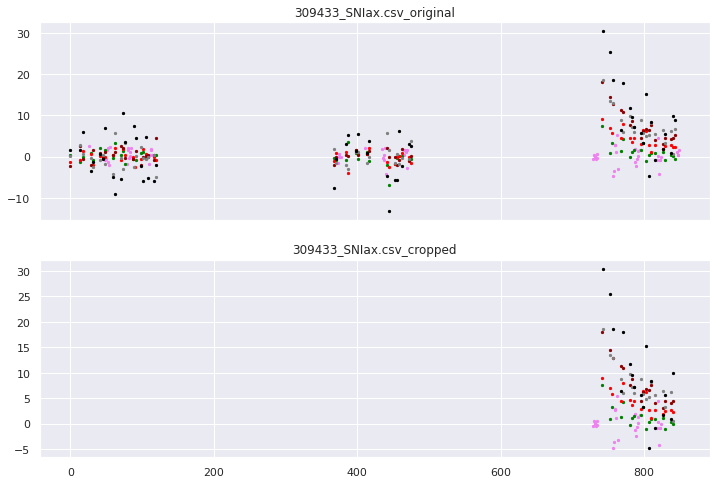

----------------------------------------------------------------------------------------------------


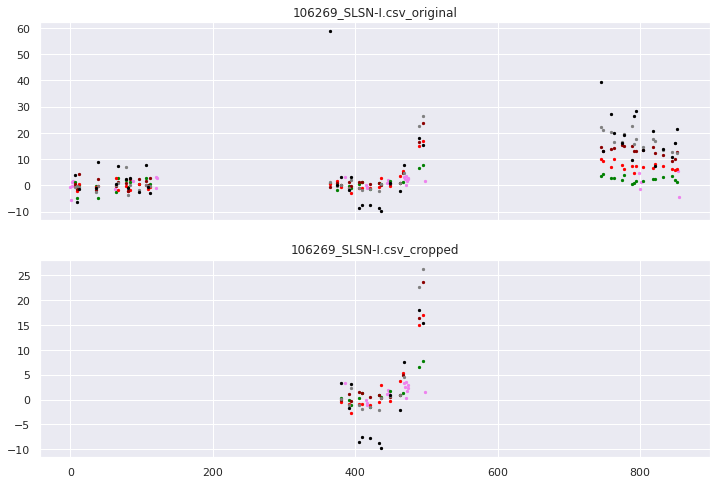

----------------------------------------------------------------------------------------------------


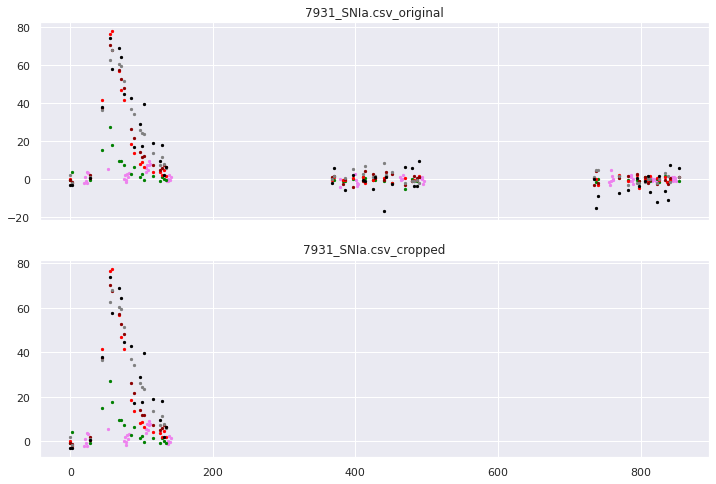

----------------------------------------------------------------------------------------------------


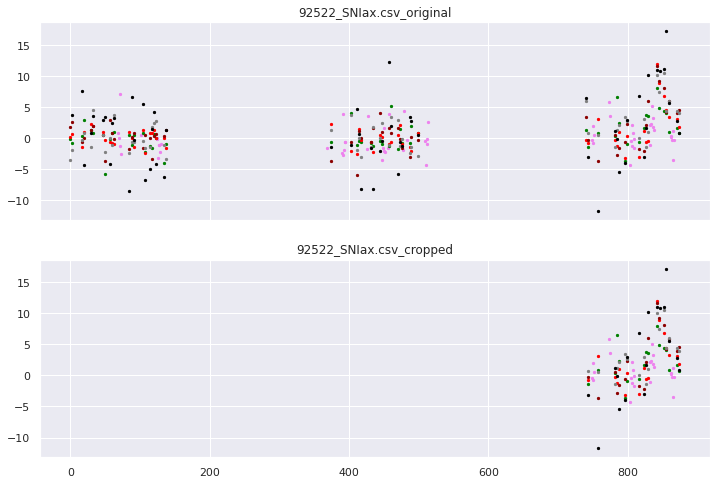

----------------------------------------------------------------------------------------------------


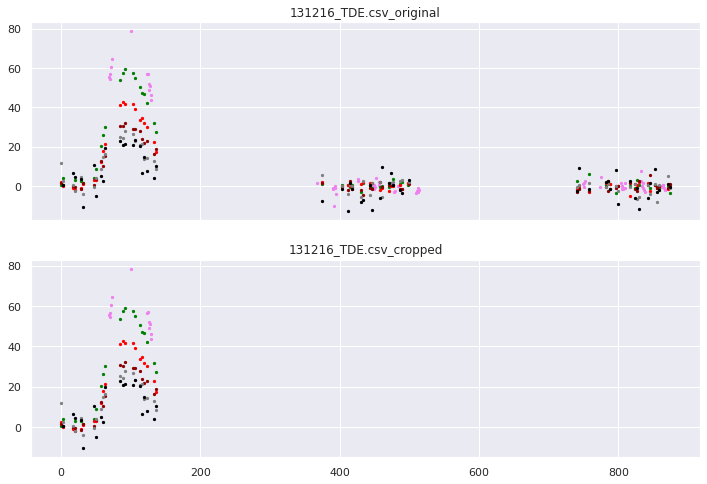

----------------------------------------------------------------------------------------------------


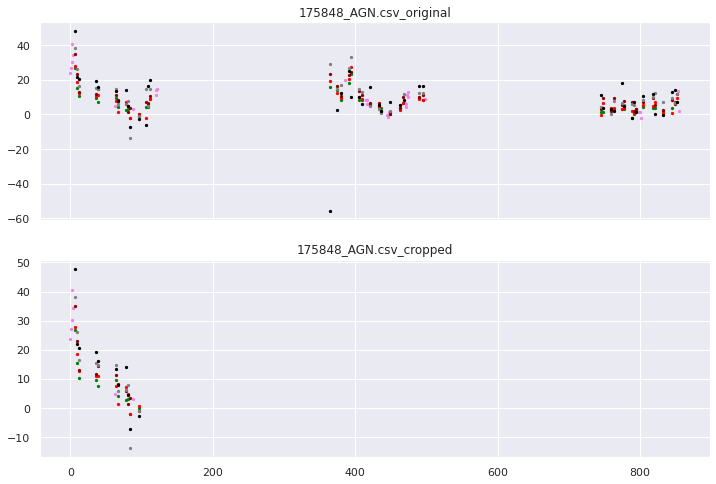

----------------------------------------------------------------------------------------------------


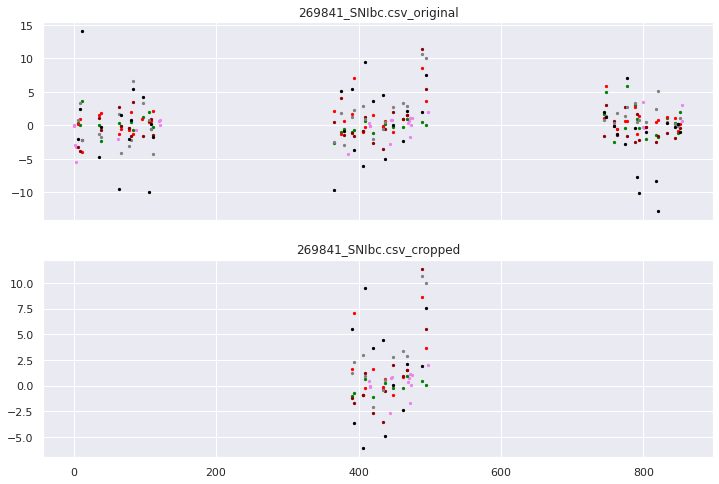

----------------------------------------------------------------------------------------------------


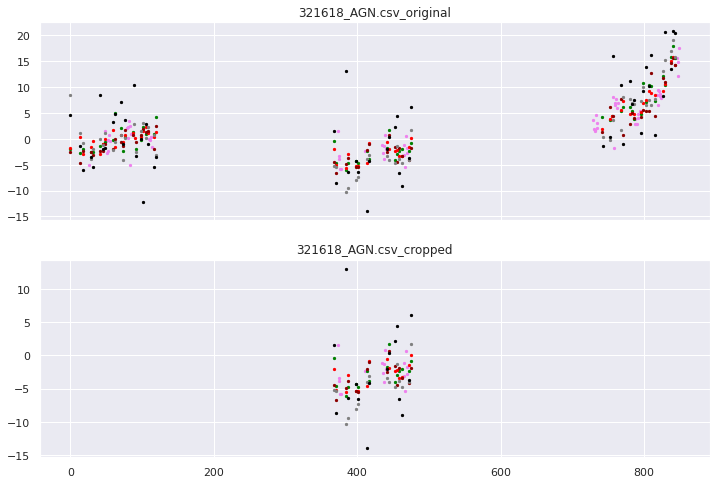

----------------------------------------------------------------------------------------------------


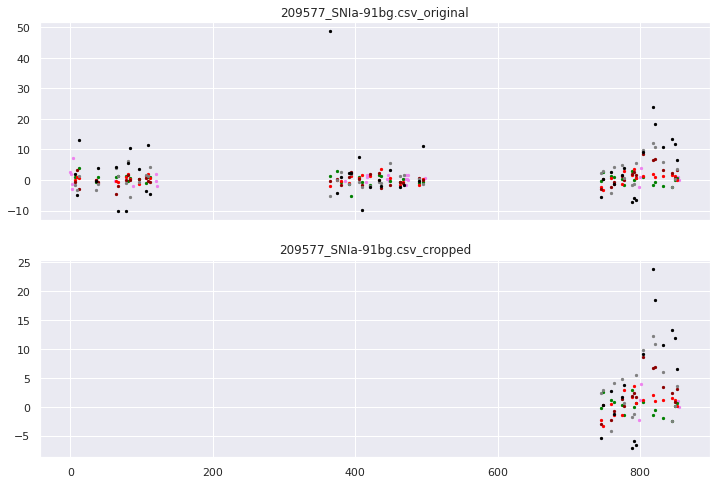

----------------------------------------------------------------------------------------------------


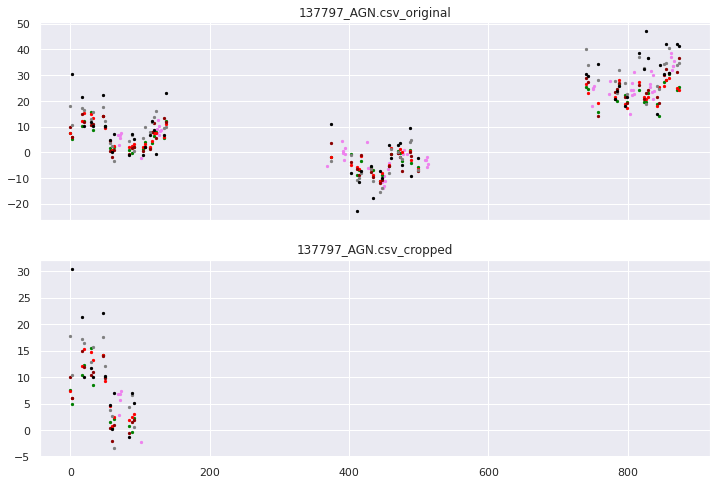

----------------------------------------------------------------------------------------------------


In [5]:
for file in random.sample(filels,10):
    title=file.split("/")[-1]
    df = pd.read_csv(file)
    newdf = center_bigdf(df)
    
    f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12,8))
    
    plot_allbands_df(df,ax=ax1,title=title+"_original")

    plot_allbands_df(newdf,ax=ax2,title=title+"_cropped")
    plt.show()
    print("-"*100)

In [6]:
if not os.path.isdir("centered_csv_data"):
    os.mkdir("centered_csv_data")

In [7]:
for file in tqdm(filels):
    df = pd.read_csv(file)
    newdf = center_bigdf(df)
    newdf.to_csv(f"centered_csv_data/{file.split('/')[-1]}",index=False)

  0%|          | 0/480 [00:00<?, ?it/s]